In [7]:
# ===========================
# HAR Clustering Project (Text File Version)
# ===========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import (
    silhouette_score, davies_bouldin_score, calinski_harabasz_score,
    adjusted_rand_score, normalized_mutual_info_score
)
from scipy.cluster.hierarchy import linkage, dendrogram

In [8]:
# ===========================
# 1. Load Data
# ===========================

# Replace with your actual file paths
X_path = "X_train.txt"
y_path = "y_train.txt"

# Load feature data (each line = one sample, space-separated floats)
X = np.loadtxt(X_path)

# Load labels (one integer per line)
y = np.loadtxt(y_path).astype(int)

print("✅ Data loaded successfully")
print("Feature matrix shape:", X.shape)
print("Labels shape:", y.shape)

✅ Data loaded successfully
Feature matrix shape: (7352, 561)
Labels shape: (7352,)


In [9]:
# ===========================
# 2. Preprocessing
# ===========================

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

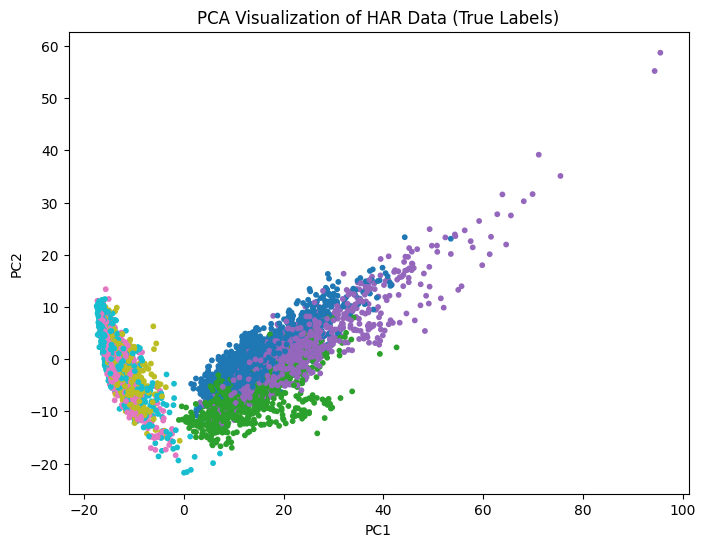

In [10]:
# ===========================
# 3. Dimensionality Reduction (PCA)
# ===========================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='tab10', s=10)
plt.title('PCA Visualization of HAR Data (True Labels)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

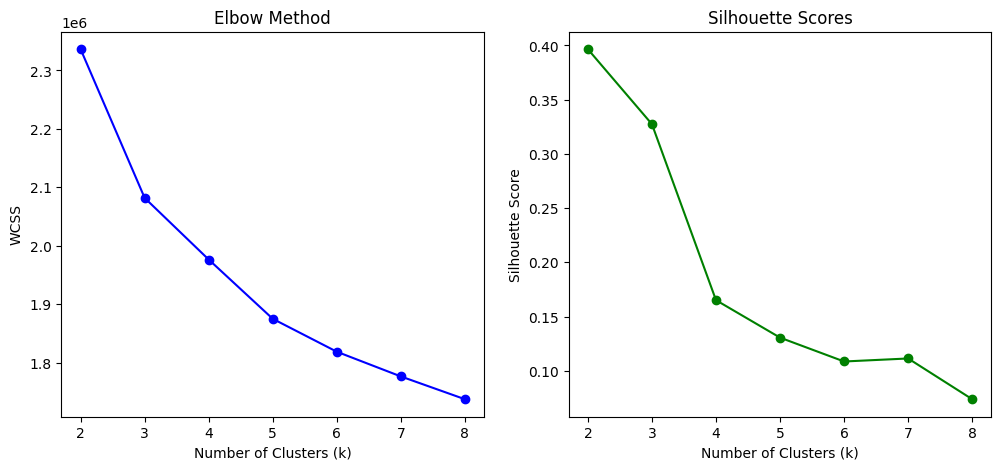

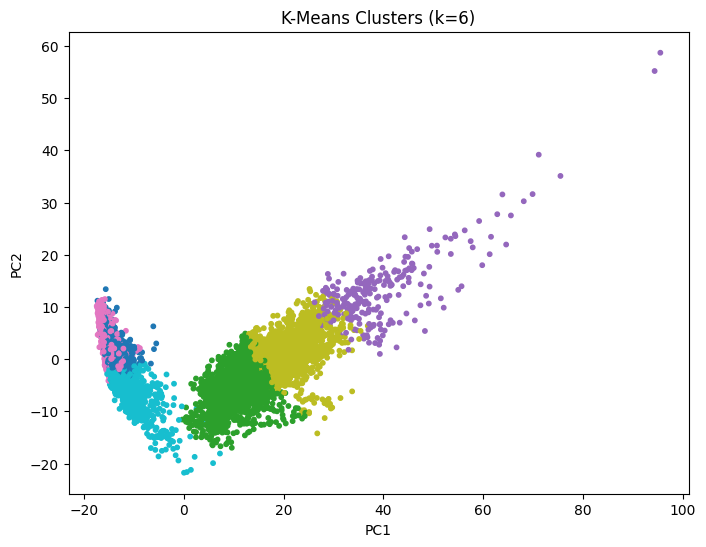

In [11]:
# ===========================
# 4. K-Means Clustering
# ===========================
wcss = []
sil_scores = []
k_values = range(2, 9)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    wcss.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, km.labels_))

# Elbow and Silhouette plots
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(k_values, wcss, 'o-', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(k_values, sil_scores, 'o-', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.show()

# Choose best k (example: 6 for 6 activities)
best_k = 6
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters_km = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_km, cmap='tab10', s=10)
plt.title(f'K-Means Clusters (k={best_k})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

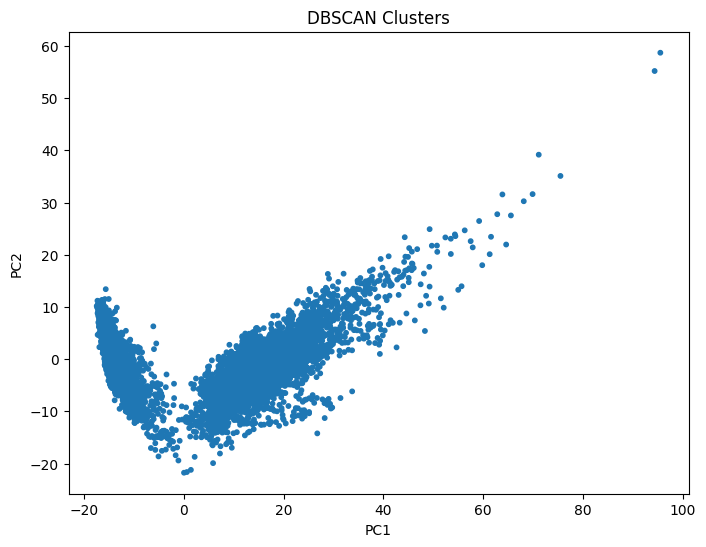

In [12]:
# ===========================
# 5. DBSCAN
# ===========================
db = DBSCAN(eps=1.5, min_samples=5)
clusters_db = db.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_db, cmap='tab10', s=10)
plt.title('DBSCAN Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

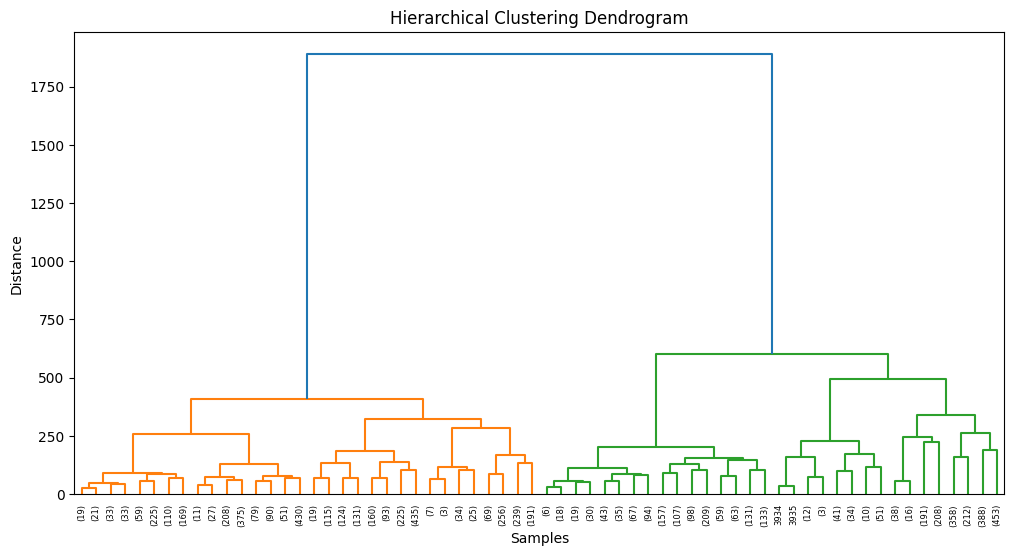

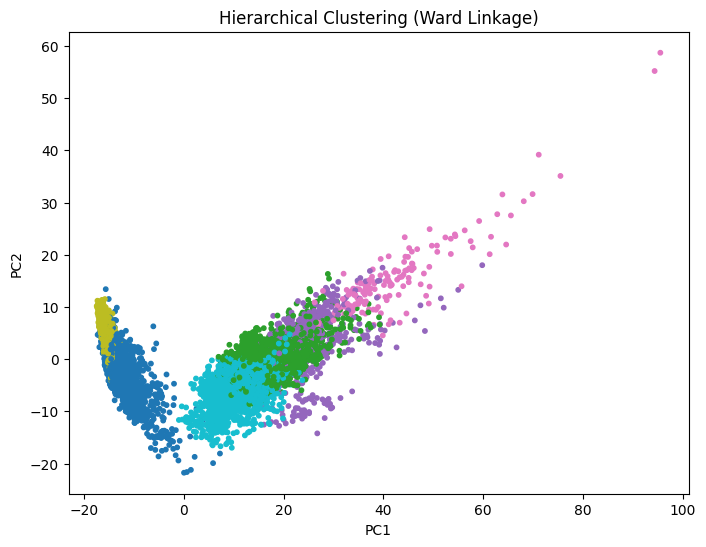

In [13]:
# ===========================
# 6. Hierarchical Clustering
# ===========================
# Dendrogram
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

hac = AgglomerativeClustering(n_clusters=6, linkage='ward')
clusters_hac = hac.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_hac, cmap='tab10', s=10)
plt.title('Hierarchical Clustering (Ward Linkage)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [14]:
# ===========================
# 7. Evaluation Metrics
# ===========================
def evaluate_clustering(X, labels, y_true=None):
    # Ignore if cluster labels have only one cluster
    unique_labels = np.unique(labels)
    if len(unique_labels) < 2:
        print("⚠️ Not enough clusters to evaluate (only one cluster).")
        return

    sil = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    print(f'Silhouette Score: {sil:.3f}')
    print(f'Davies-Bouldin Index: {db:.3f}')
    print(f'Calinski-Harabasz Index: {ch:.3f}')

    if y_true is not None:
        ari = adjusted_rand_score(y_true, labels)
        nmi = normalized_mutual_info_score(y_true, labels)
        print(f'Adjusted Rand Index (ARI): {ari:.3f}')
        print(f'Normalized Mutual Information (NMI): {nmi:.3f}')
    print('-'*60)

print("K-Means Evaluation:")
evaluate_clustering(X_scaled, clusters_km, y)

print("DBSCAN Evaluation:")
evaluate_clustering(X_scaled, clusters_db, y)

print("Hierarchical Evaluation:")
evaluate_clustering(X_scaled, clusters_hac, y)

K-Means Evaluation:
Silhouette Score: 0.109
Davies-Bouldin Index: 2.358
Calinski-Harabasz Index: 1862.506
Adjusted Rand Index (ARI): 0.420
Normalized Mutual Information (NMI): 0.559
------------------------------------------------------------
DBSCAN Evaluation:
⚠️ Not enough clusters to evaluate (only one cluster).
Hierarchical Evaluation:
Silhouette Score: 0.083
Davies-Bouldin Index: 2.786
Calinski-Harabasz Index: 1730.836
Adjusted Rand Index (ARI): 0.279
Normalized Mutual Information (NMI): 0.454
------------------------------------------------------------
